# Análise Clientes - Analytics

Manoel Eugenio Dalbem Lopes.

Linkedin: https://www.linkedin.com/in/manoeldalbem

In [1]:
# Importando as bibliotecas:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [2]:
base_dados = pd.read_csv('C:/Users/Manoel/Documents/Analytics/Clientes/base_dados.csv')

In [3]:
base_dados

,accountid,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
...,...,...,...,...,...,...,...,...
126984,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ
126985,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ
126986,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ
126987,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ


In [4]:
# dropando os duplicados
base_dados.drop_duplicates(inplace=True)

In [5]:
# dropando os nan que restaram no Id
base_dados.dropna(subset = ["accountid"], inplace=True)

In [6]:
# resetando o index
base_dados.reset_index(drop=True, inplace=True)
base_dados

,accountid,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
1,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU
2,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU
3,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC
4,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC
...,...,...,...,...,...,...,...,...
77484,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ
77485,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ
77486,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ
77487,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ


In [7]:
# fazendo um describe após dropar os nan e as linhas duplicadas.
base_dados.describe(include='all')

,accountid,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id
count,77489,77489,77489.0,77489.000000,77489,11585,77489,77489
unique,31429,245,NaN,NaN,2,10,221,31429
top,0011L00002WeMWyQAN,2020-09-10,NaN,NaN,False,Enviado,Produto:Cartão pré-pago:Dúvidas,0011L00002WeMWyQAN
freq,56,1008,NaN,NaN,77483,9996,5153,56
mean,NaN,NaN,2.0,17.224767,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,78.520336,NaN,NaN,NaN,NaN
min,NaN,NaN,2.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.0,6.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.0,9.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.0,14.000000,NaN,NaN,NaN,NaN


In [8]:
base_dados['Tempo_de_Espera'].describe()

count    77489.000000
mean        17.224767
std         78.520336
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max       7993.000000
Name: Tempo_de_Espera, dtype: float64

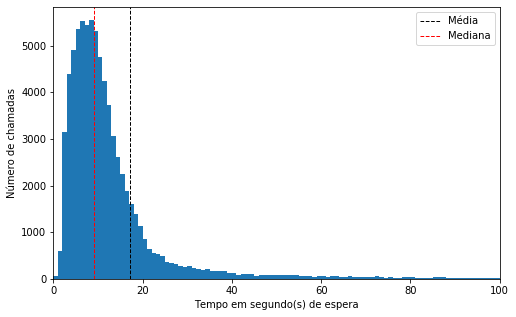

In [9]:
# plotando gráfico da coluna waitingtime:
plt.figure(figsize=(8, 5))
media = base_dados['Tempo_de_Espera'].mean()
mediana = base_dados['Tempo_de_Espera'].median()
plt.hist(base_dados['Tempo_de_Espera'], bins=range(0, 150))
plt.ylabel('Número de chamadas')
plt.xlabel('Tempo em segundo(s) de espera')
plt.xlim(xmin=0, xmax = 100)
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

<p style='text-align: justify;'>O gráfico anterior ilustra o tempode espera quando o cliente realiza uma operação.
A média do tempo de espera é de 17 segundos enquanto a mediana, é de 9 segundos - ou seja, metade do tempo de espera foi menor que 9 segundos, enquanto a outra metado ficou acima disso. Já o desvio-padrão foi de 78.52 segundos.
O fato da médiana ser menor que a média chama atenção. Isso ocorre porque há alguns outiliers bem elevados que acabam elevando a média, uma vez que o tempo de espera máximo foi de 7993, valor esse que é 470 vezes maior que a média.
Além disso, 75% das ligações tiveram um tempo de espera menor que 14 segundos, valor menor que a média registrada ao longo do período.</p>

In [10]:
base_dados['missed'].value_counts()

False    77483
True         6
Name: missed, dtype: int64

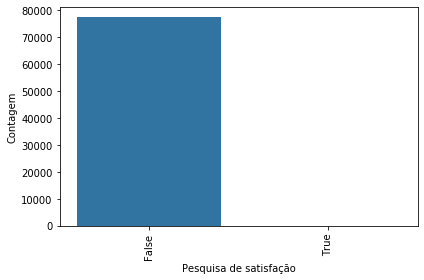

In [11]:
sns.countplot(data=base_dados,  x="missed")
plt.xlabel('Pesquisa de satisfação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

Em relação ao flag de ligações missed temos um resultado muito interessante e expressivo: apenas 6 ligacções tiveram true, indicando que foram perdidas. Se análise for realizada de forma % seria "praticamente" zero, uma vez que há mais 70 mil observações.

In [12]:
base_dados['Pesquisa_de_Satisfação'].value_counts()

Enviado        9996
Incrivel        899
Bom             425
Normal          112
NaoResolveu     107
Feliz            19
MalAtendido      16
Triste            6
Pessimo           3
Cansativo         2
Name: Pesquisa_de_Satisfação, dtype: int64

In [13]:
base_dados['Pesquisa_de_Satisfação'].value_counts(dropna=False)

NaN            65904
Enviado         9996
Incrivel         899
Bom              425
Normal           112
NaoResolveu      107
Feliz             19
MalAtendido       16
Triste             6
Pessimo            3
Cansativo          2
Name: Pesquisa_de_Satisfação, dtype: int64

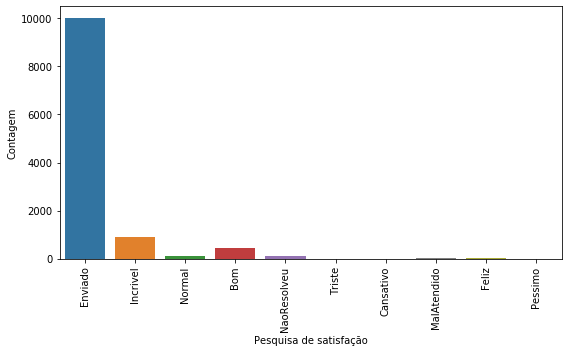

In [14]:
# Gráfico em barras da pesquisa de satisfação:
plt.figure(figsize=(8, 5))
sns.countplot(data=base_dados,  x="Pesquisa_de_Satisfação")
plt.xlabel('Pesquisa de satisfação')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

In [15]:
satisfacao = base_dados['Pesquisa_de_Satisfação'].unique().tolist()
#satisfacao.sort()

In [16]:
satisfacao_perc = base_dados['Pesquisa_de_Satisfação'].value_counts(normalize=True) * 100
indices = list(satisfacao_perc.keys())

In [17]:
satisfacao_perc.keys().tolist()

['Enviado',
 'Incrivel',
 'Bom',
 'Normal',
 'NaoResolveu',
 'Feliz',
 'MalAtendido',
 'Triste',
 'Pessimo',
 'Cansativo']

In [18]:
# verificando o % por quartos:
print(f"O percentual de Nan's é de {np.round(base_dados['Pesquisa_de_Satisfação'].isna().sum()/len(base_dados['Pesquisa_de_Satisfação']), 2)*100}%.")

for i in indices:
    print(f"O percentual da regiao {i} é de {np.round ((satisfacao_perc[i]), 2)}%.")

O percentual de Nan's é de 85.0%.
O percentual da regiao Enviado é de 86.28%.
O percentual da regiao Incrivel é de 7.76%.
O percentual da regiao Bom é de 3.67%.
O percentual da regiao Normal é de 0.97%.
O percentual da regiao NaoResolveu é de 0.92%.
O percentual da regiao Feliz é de 0.16%.
O percentual da regiao MalAtendido é de 0.14%.
O percentual da regiao Triste é de 0.05%.
O percentual da regiao Pessimo é de 0.03%.
O percentual da regiao Cansativo é de 0.02%.


<p style='text-align: justify;'>Chama atenção também a quantidade de Nan's, é um tanto elevado - 85%.

<p style='text-align: justify;'>Da pesquisa de satisfação válida, 86.28% ainda não foi analisado, ou seja, quase toda sua totalidade.
Contudo, analisando os dados restantes, 7.76% apontou como incrível e 3.67% como bom. Então, de certa forma, o feedback do cliente é positivo, quando analisado o feedback que já foi enviado.

Como os assuntos parecem possuir três campos (assunto primário, secundário e terciário), as seguintes funções foram criadas com o objetivo de desmembrar esses assuntos.

In [19]:
"""
Função que procura um caracter numa string e retorna toda as posições desse caracter numa lista.
Para nosso interesse específico, desejamos saber as posições dos dois pontos (:)
"""
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs


In [20]:
"""" Função que separa o assunto em assunto principal, secundário e terciário. 
Retorna um dicionário com as listas de cada assunto."""
def desmembrando_assunto(dataset):
    assun_primario = []
    assun_secundario = []
    assun_terciario = []
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            lista = list_duplicates_of(dataset[i], ':')
        assun_primario.append(dataset[i][:lista[0]])
        aux_1 = lista[0] + 1
        assun_secundario.append(dataset[i][aux_1:lista[1]])
        aux_2 = lista[1] + 1
        assun_terciario.append(dataset[i][aux_2:])
        
    assuntos = {'assunto_primario':assun_primario,
                'assunto_secundario': assun_secundario,
                'assunto_terciario': assun_terciario}
    return assuntos

In [21]:
"""" Função que separa o assunto em assunto principal, secundário e terciário. 
Retorna um dicionário com as listas de cada assunto."""
def desmembrando_assunto_p(dataset):
    lista = list_duplicates_of(dataset, ':')
    assun_primario = (dataset[:lista[0]])
    #aux_1 = lista[0] + 1
    #assun_secundario = (dataset[aux_1:lista[1]])
    #aux_2 = lista[1] + 1
    #assun_terciario = (dataset[aux_2:])
    
    return assun_primario

In [22]:
"""" Função que separa o assunto em assunto principal, secundário e terciário. 
Retorna um dicionário com as listas de cada assunto."""
def desmembrando_assunto_s(dataset):
    lista = list_duplicates_of(dataset, ':')
    assun_primario = (dataset[:lista[0]])
    aux_1 = lista[0] + 1
    assun_secundario = (dataset[aux_1:lista[1]])
    #aux_2 = lista[1] + 1
    #assun_terciario = (dataset[aux_2:])
    
    return assun_secundario

In [23]:
"""" Função que separa o assunto em assunto principal, secundário e terciário. 
Retorna um dicionário com as listas de cada assunto."""
def desmembrando_assunto_t(dataset):
    lista = list_duplicates_of(dataset, ':')
    assun_primario = (dataset[:lista[0]])
    aux_1 = lista[0] + 1
    assun_secundario = (dataset[aux_1:lista[1]])
    aux_2 = lista[1] + 1
    assun_terciario = (dataset[aux_2:])
    
    return assun_terciario

In [24]:
start_time = time.time()
base_dados['assunto_primario'] = base_dados['assunto'].apply(desmembrando_assunto_p)
base_dados['assunto_secundario'] = base_dados['assunto'].apply(desmembrando_assunto_s)
base_dados['assunto_terciario'] = base_dados['assunto'].apply(desmembrando_assunto_t)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9324238300323486 seconds ---


In [25]:
base_dados

,accountid,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id,assunto_primario,assunto_secundario,assunto_terciario
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso
1,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU,Produto,S920,Ativação
2,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU,Produto,Cartão pré-pago,Dúvidas
3,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC,Logística,Envio de Cartão,Tracking
4,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC,Pedido,Cancelamento,Outros
...,...,...,...,...,...,...,...,...,...,...,...
77484,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ,Aplicativo,Dúvidas funcionalidades App,Prazos e taxas
77485,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ,Produto,D195,Ativação
77486,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ,Cadastro,Recredenciamento,Dúvidas
77487,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ,Produto,Cartão pré-pago,Dúvidas


In [26]:
base_dados['channelid'].value_counts()

2.0    77489
Name: channelid, dtype: int64

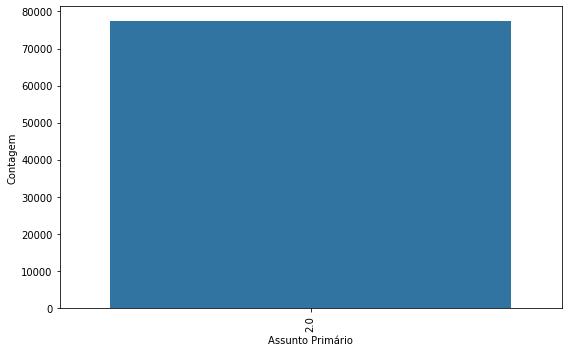

In [27]:
# gráfico em barra dos assuntos primários.
plt.figure(figsize=(8, 5))
sns.countplot(data=base_dados,  x="channelid")
plt.xlabel('Assunto Primário')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

In [28]:
base_dados['assunto_primario'].value_counts()

Produto                   22182
Aplicativo                20507
Logística                 15583
Cadastro                   6310
Pedido                     3266
Transferência de saldo     3013
Transação                  2265
Feedback do cliente        1205
Bandeira                   1061
Outros                     1056
Incidente                   486
Bandeiras                   230
Risco                       162
                            106
Telecom                      36
Comunicados                  21
Name: assunto_primario, dtype: int64

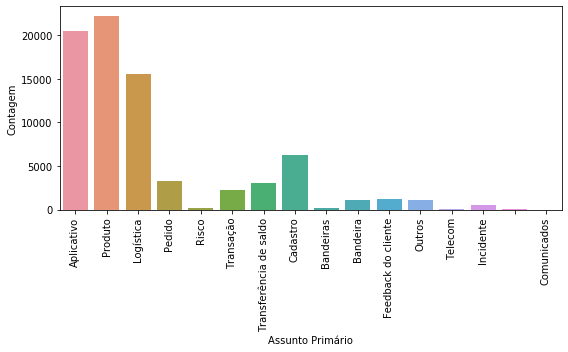

In [29]:
# gráfico em barra dos assuntos primários.
plt.figure(figsize=(8, 5))
sns.countplot(data=base_dados,  x="assunto_primario")
plt.xlabel('Assunto Primário')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

Analisando o assunto primário, é possíver perceber que há três principais ocorrências: aplicativo, produto e logística.

In [30]:
primario_perc = base_dados['assunto_primario'].value_counts(normalize=True) * 100
indices = list(primario_perc.keys())

In [31]:
# verificando o % por quartos:
#print(f"O percentual de Nan's é de {np.round(base_dados['Pesquisa_de_Satisfação'].isna().sum()/len(base_dados['Pesquisa_de_Satisfação']), 2)*100}%.")

for i in indices:
    print(f"O percentual de assunto primário do tipo {i} é de {np.round ((primario_perc[i]), 2)}%.")

O percentual de assunto primário do tipo Produto é de 28.63%.
O percentual de assunto primário do tipo Aplicativo é de 26.46%.
O percentual de assunto primário do tipo Logística é de 20.11%.
O percentual de assunto primário do tipo Cadastro é de 8.14%.
O percentual de assunto primário do tipo Pedido é de 4.21%.
O percentual de assunto primário do tipo Transferência de saldo é de 3.89%.
O percentual de assunto primário do tipo Transação é de 2.92%.
O percentual de assunto primário do tipo Feedback do cliente é de 1.56%.
O percentual de assunto primário do tipo Bandeira é de 1.37%.
O percentual de assunto primário do tipo Outros é de 1.36%.
O percentual de assunto primário do tipo Incidente é de 0.63%.
O percentual de assunto primário do tipo Bandeiras é de 0.3%.
O percentual de assunto primário do tipo Risco é de 0.21%.
O percentual de assunto primário do tipo  é de 0.14%.
O percentual de assunto primário do tipo Telecom é de 0.05%.
O percentual de assunto primário do tipo Comunicados é

Analisando o assunto primário, podemos chegar as seguintes conclusões:

Informações em relação ao Produto, representam 28.63%;

Já em segundo lugar, aparece Aplicativo, com 26.46%.

E em terceiro, Logística, com 20.11%.

Esses três tipos juntos concentram os priciapais chamados de assuntos primários, com mais de 70%.

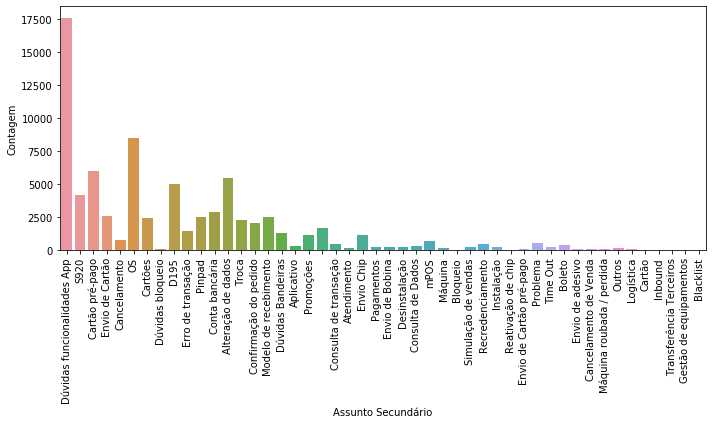

In [32]:
# gráfico em barra dos assuntos secundários.
plt.figure(figsize=(10, 6))
sns.countplot(data=base_dados,  x="assunto_secundario")
plt.xlabel('Assunto Secundário')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

In [33]:
secundario_perc = base_dados['assunto_secundario'].value_counts(normalize=True) * 100
indices = list(secundario_perc.keys())

In [34]:
for i in indices:
    print(f"O percentual de assunto secundário do tipo {i} é de {np.round ((secundario_perc[i]), 2)}%.")

O percentual de assunto secundário do tipo Dúvidas funcionalidades App é de 22.66%.
O percentual de assunto secundário do tipo OS é de 10.91%.
O percentual de assunto secundário do tipo Cartão pré-pago é de 7.75%.
O percentual de assunto secundário do tipo Alteração de dados é de 7.04%.
O percentual de assunto secundário do tipo D195 é de 6.49%.
O percentual de assunto secundário do tipo S920 é de 5.38%.
O percentual de assunto secundário do tipo Conta bancária é de 3.75%.
O percentual de assunto secundário do tipo Envio de Cartão é de 3.36%.
O percentual de assunto secundário do tipo Pinpad é de 3.22%.
O percentual de assunto secundário do tipo Modelo de recebimento é de 3.21%.
O percentual de assunto secundário do tipo Cartões é de 3.19%.
O percentual de assunto secundário do tipo Troca é de 2.93%.
O percentual de assunto secundário do tipo Confirmação do pedido é de 2.65%.
O percentual de assunto secundário do tipo  é de 2.22%.
O percentual de assunto secundário do tipo Erro de tran

Quando analisado o assunto secundário, mostrou uma diversidade maior que o primário.

Dúvidas funcionalidades App foi disparado a principal ocorrência com 22.66%. Em segundo aparece o SO, que teve 10.91%. Já em terceiro, Cartão pré-pago com 7.75%.

In [35]:
len(base_dados['assunto_terciario'].value_counts())

108

In [36]:
terc = base_dados['assunto_terciario'].value_counts().iloc[:20]

In [37]:
terc.index

Index(['', 'Dúvidas', 'Tracking de OS', 'Transferência bancária', 'Problema',
       'Ativação', 'Link de Pagamento', 'Cadastro de conta bancária',
       'Redefinição de senha', 'Nome fantasia', 'Tracking', 'Dúvida S920',
       'Saldo', 'Falha de Conexão - não revertido', 'Dúvida D195', 'Outros',
       'Pareamento', 'OS atrasada', 'Confirmação/alteração de dados',
       'Ineficiência'],
      dtype='object')

In [38]:
len(terc)

20

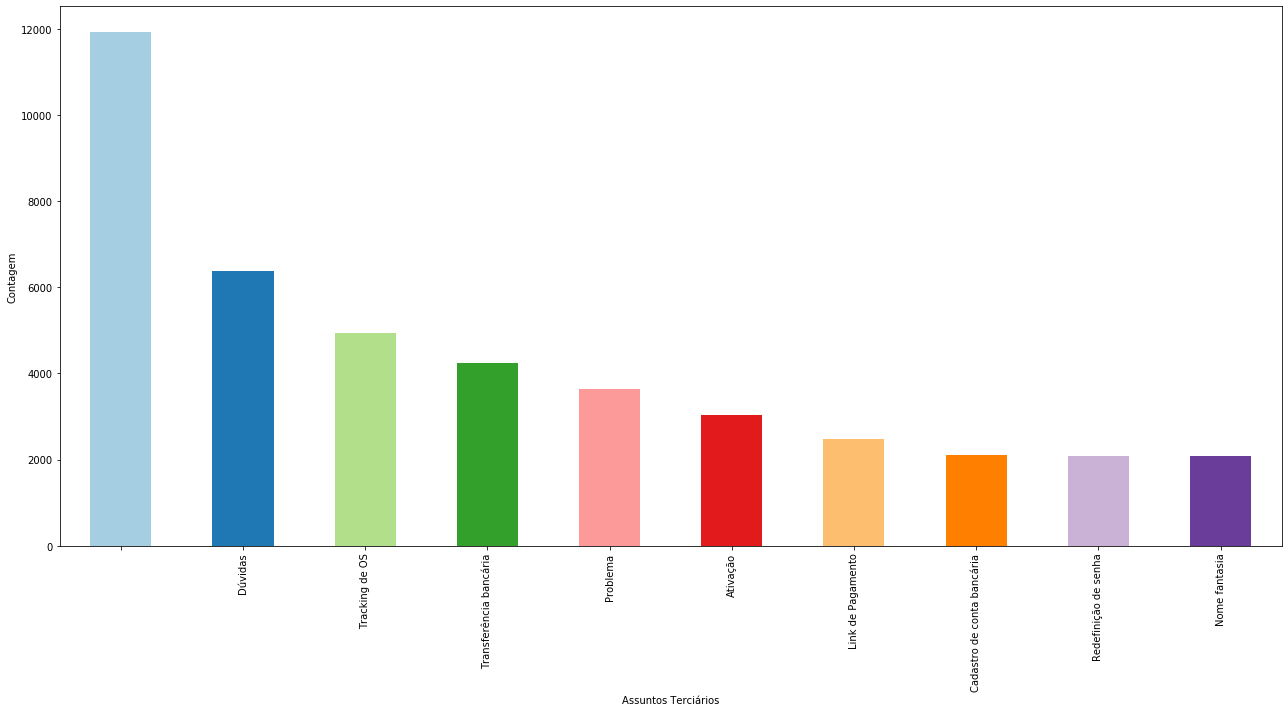

In [39]:
# gráfico em barra dos assuntos terciários.
plt.figure(figsize=(18, 10))
terc[:10].plot(kind='bar', color=plt.cm.Paired(np.arange(len(terc))))
plt.xlabel('Assuntos Terciários')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.tight_layout()

Por fim, o assunto terciário apresentou um resultado inesperado: a principal ocorrência foi o campo em branco, sem assunto, seguido de dúvidas.

In [40]:
terciario_perc = terc.value_counts(normalize=True) * 100
indices = list(terciario_perc.keys())

In [41]:
terc.keys()

Index(['', 'Dúvidas', 'Tracking de OS', 'Transferência bancária', 'Problema',
       'Ativação', 'Link de Pagamento', 'Cadastro de conta bancária',
       'Redefinição de senha', 'Nome fantasia', 'Tracking', 'Dúvida S920',
       'Saldo', 'Falha de Conexão - não revertido', 'Dúvida D195', 'Outros',
       'Pareamento', 'OS atrasada', 'Confirmação/alteração de dados',
       'Ineficiência'],
      dtype='object')

In [42]:
for i in terc.keys():
    print(f"O percentual de assunto terciário do tipo {i} é de {np.round ((terc[i])/len(base_dados['assunto_terciario'])*100, 2)}%.")

O percentual de assunto terciário do tipo  é de 15.39%.
O percentual de assunto terciário do tipo Dúvidas é de 8.22%.
O percentual de assunto terciário do tipo Tracking de OS é de 6.38%.
O percentual de assunto terciário do tipo Transferência bancária é de 5.48%.
O percentual de assunto terciário do tipo Problema é de 4.7%.
O percentual de assunto terciário do tipo Ativação é de 3.91%.
O percentual de assunto terciário do tipo Link de Pagamento é de 3.21%.
O percentual de assunto terciário do tipo Cadastro de conta bancária é de 2.73%.
O percentual de assunto terciário do tipo Redefinição de senha é de 2.7%.
O percentual de assunto terciário do tipo Nome fantasia é de 2.68%.
O percentual de assunto terciário do tipo Tracking é de 2.65%.
O percentual de assunto terciário do tipo Dúvida S920 é de 2.52%.
O percentual de assunto terciário do tipo Saldo é de 2.5%.
O percentual de assunto terciário do tipo Falha de Conexão - não revertido é de 2.39%.
O percentual de assunto terciário do tipo

Analisando o assunto terciário, podemos chegar as seguintes conclusões:

O que possui maior percentual tem o campo vazio, com 15.39%.
O segundo assunto que mais aparece é o de dúvidas com 8.22%.
O terceiro é o Tracking de OS, com 6.38%.

In [43]:
cadastro = pd.read_csv('C:/Users/Manoel/Documents/Analytics/Clientes/cadastro.csv')

In [44]:
cadastro

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid
0,2020-04-18,Feira de Santana,BA,SS12,NaN
1,2020-10-16,Bacuri,MA,SS12,NaN
2,2020-09-01,Bernardo Sayão,TO,SS12,NaN
3,2020-08-29,Rio de Janeiro,RJ,RR78,NaN
4,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU
...,...,...,...,...,...
126984,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ
126985,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ
126986,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ
126987,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ


In [45]:
# dropando os duplicados
cadastro.drop_duplicates(inplace=True)

In [46]:
cadastro

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid
0,2020-04-18,Feira de Santana,BA,SS12,NaN
1,2020-10-16,Bacuri,MA,SS12,NaN
2,2020-09-01,Bernardo Sayão,TO,SS12,NaN
3,2020-08-29,Rio de Janeiro,RJ,RR78,NaN
4,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU
...,...,...,...,...,...
126971,2020-06-18,Aracaju,SE,RR78,0013j00002ye8jtAAA
126973,2020-10-20,Feira de Santana,BA,HH45,NaN
126974,2020-07-31,Niterói,RJ,HH45,0013j00002z1AyaAAE
126975,2020-09-16,Itajaí,SC,RR78,0013j00002zfshHAAQ


In [47]:
cadastro.isna().sum()

Data_Credenciamento        0
Cidade_Origem              0
Estado_Origem              0
Tipo_Produto               0
accountid              34728
dtype: int64

In [48]:
#creds.dropna(subset = ["accountid"], inplace=True)

In [49]:
cadastro.reset_index(drop=True, inplace=True)
cadastro

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid
0,2020-04-18,Feira de Santana,BA,SS12,NaN
1,2020-10-16,Bacuri,MA,SS12,NaN
2,2020-09-01,Bernardo Sayão,TO,SS12,NaN
3,2020-08-29,Rio de Janeiro,RJ,RR78,NaN
4,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU
...,...,...,...,...,...
66152,2020-06-18,Aracaju,SE,RR78,0013j00002ye8jtAAA
66153,2020-10-20,Feira de Santana,BA,HH45,NaN
66154,2020-07-31,Niterói,RJ,HH45,0013j00002z1AyaAAE
66155,2020-09-16,Itajaí,SC,RR78,0013j00002zfshHAAQ


Pelo fato de possuir o estado de cada cred_date, achei interessante por a região além do estado. Assim, é possível verificar a região que mais possui clientes, além do próprio estado.

Criei então uma função que retorna uma lista, onde o input é um dicionário com lista de cada região e por fim, uma nova coluna, 'regiao' foi criada no dataframe.

In [50]:
def div_reg(subset):
    
    sul = ['PR', 'SC', 'RS']
    sudeste = ['SP', 'MG', 'RJ', 'ES']
    norte = ['AC', 'AM', 'RO', 'RR', 'AP', 'PA', 'TO']
    centro_oeste = ['MS', 'MT', 'GO', 'DF']
    nordeste = ['MA', 'PI', 'BA', 'CE', 'PE', 'SE', 'AL', 'PB', 'RN']
    
    if subset in sul:
        return 'Sul'
    elif subset in sudeste:
        return 'Sudeste'
    elif subset in norte:
        return 'Norte'
    elif subset in centro_oeste:
        return 'Centro-Oeste'
    else: 
        return 'Nordeste'

In [51]:
cadastro['regiao'] = cadastro['Estado_Origem'].apply(div_reg)

In [52]:
cadastro

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid,regiao
0,2020-04-18,Feira de Santana,BA,SS12,NaN,Nordeste
1,2020-10-16,Bacuri,MA,SS12,NaN,Nordeste
2,2020-09-01,Bernardo Sayão,TO,SS12,NaN,Norte
3,2020-08-29,Rio de Janeiro,RJ,RR78,NaN,Sudeste
4,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste
...,...,...,...,...,...,...
66152,2020-06-18,Aracaju,SE,RR78,0013j00002ye8jtAAA,Nordeste
66153,2020-10-20,Feira de Santana,BA,HH45,NaN,Nordeste
66154,2020-07-31,Niterói,RJ,HH45,0013j00002z1AyaAAE,Sudeste
66155,2020-09-16,Itajaí,SC,RR78,0013j00002zfshHAAQ,Sul


In [53]:
# fazendo uma análise da base creds após a limpa:

In [54]:
def agrupando_contagem_pela_key(key, dataset):
    contagem = dataset.groupby(key).count()
    contagem = contagem.reset_index()
    contagem = contagem[[key, 'Data_Credenciamento']]
    contagem = contagem.rename({'Data_Credenciamento': 'contagem'}, axis=1)
    return contagem

In [55]:
def grafico_pizza(dataset, key):
    fig1, ax1 = plt.subplots()
    ax1.pie(dataset['contagem'], labels = dataset[key],shadow=False, startangle=90, autopct='%1.1f%%') 
    #ax1.axis('equal') 
    plt.show()
    return

<p style='text-align: justify;'>A seguir dois gráficos em pizza das colunas 'Tipo_Produto' e 'regiao'.
Bom lembrar que nesse Dataframe o drop foi realizado apenas em relação as linhas duplicadas.
Ainda há dados a serem dropados futuramente nesse dataframe, que são os clientes com Id como nan.
Assim, essas proporções podem mudar.

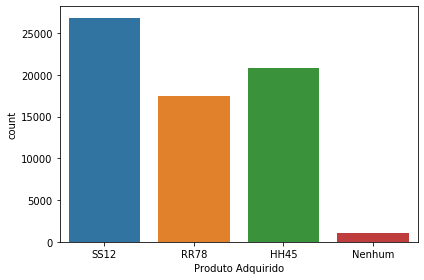

In [56]:
sns.countplot(x='Tipo_Produto', data=cadastro)
plt.xlabel('Produto Adquirido')
plt.tight_layout()

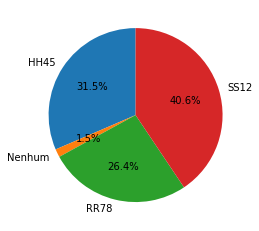

In [57]:
nome = 'Tipo_Produto'
agrupando = agrupando_contagem_pela_key(nome, cadastro)
teste = grafico_pizza(agrupando, nome)

Analisando os gráficos, SS12 foi o produto mais adquirido (40.6%), seguido do HH45 (31.05%), depois RR78 (26.4%) e clientes cadastrados que não possuem nenhum produto representam apenas (1.5%).

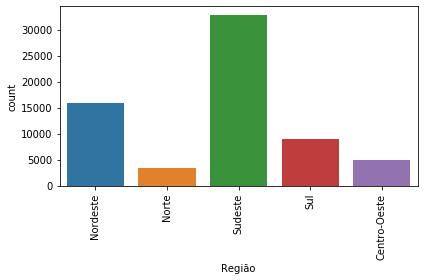

In [58]:
sns.countplot(data=cadastro,  x="regiao")
plt.xlabel('Região')
plt.xticks(rotation=90)
plt.tight_layout()

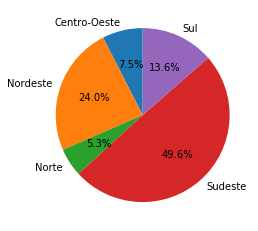

In [59]:
nome = 'regiao'
agrupando = agrupando_contagem_pela_key(nome, cadastro)
teste = grafico_pizza(agrupando, nome)

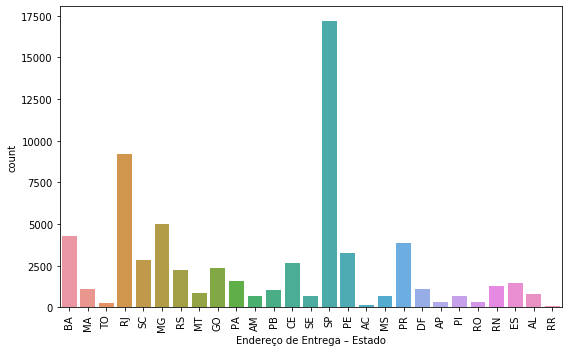

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=cadastro,  x="Estado_Origem")
plt.xlabel('Endereço de Entrega – Estado')
plt.xticks(rotation=90)
plt.tight_layout()

In [61]:
estado_perc = cadastro['Estado_Origem'].value_counts(normalize=True) * 100
indices = list(estado_perc.keys())

In [62]:
for i in indices:
    print(f"O percentual do Estado {i} é de {np.round ((estado_perc[i]), 2)}%.")

O percentual do Estado SP é de 26.01%.
O percentual do Estado RJ é de 13.88%.
O percentual do Estado MG é de 7.54%.
O percentual do Estado BA é de 6.48%.
O percentual do Estado PR é de 5.86%.
O percentual do Estado PE é de 4.95%.
O percentual do Estado SC é de 4.31%.
O percentual do Estado CE é de 4.01%.
O percentual do Estado GO é de 3.54%.
O percentual do Estado RS é de 3.41%.
O percentual do Estado PA é de 2.43%.
O percentual do Estado ES é de 2.18%.
O percentual do Estado RN é de 1.99%.
O percentual do Estado DF é de 1.67%.
O percentual do Estado MA é de 1.65%.
O percentual do Estado PB é de 1.59%.
O percentual do Estado MT é de 1.3%.
O percentual do Estado AL é de 1.25%.
O percentual do Estado PI é de 1.06%.
O percentual do Estado SE é de 1.05%.
O percentual do Estado AM é de 1.01%.
O percentual do Estado MS é de 0.99%.
O percentual do Estado AP é de 0.51%.
O percentual do Estado RO é de 0.48%.
O percentual do Estado TO é de 0.44%.
O percentual do Estado AC é de 0.22%.
O percentua

<p style='text-align: justify;'>O primeiro ponto a destacar é que região sudeste possui quase metade dos clientes credenciados (49.6%), seguida da região nordeste (24.0%), seguido da região sul em terceiro (13.60%), em quarto a região Centro-Oeste (7.5%) e por último a região Norte (5.3 %).

<p style='text-align: justify;'>Quando analisado os estados, Sâo Paulo possui o maior número de clientes credenciados (26.01%), seguido do Rio de Janeiro (13.88%) e em terceiro lugar Minas Gerais (7.54%). Os três estados que possuem mais clientes credenciados são todos da região Sudeste, o que reforça a análise acima, feita que essa região possui quase metade dos clientes. Na última posição se enconta o estado de Roraima (0.17%), com apenas 114 clientes cadastrados.

In [63]:
base_dados.dtypes

accountid                  object
Data_de_Referência         object
channelid                 float64
Tempo_de_Espera           float64
missed                     object
Pesquisa_de_Satisfação     object
assunto                    object
Id                         object
assunto_primario           object
assunto_secundario         object
assunto_terciario          object
dtype: object

In [64]:
base_dados['Data_de_Referência'] = pd.to_datetime(base_dados['Data_de_Referência'],format='%Y-%m-%d')

In [65]:
#tempo_espera_medio_mensal = base_dados.groupby([pd.Grouper(key="Data_de_Referência", freq="1M")])['Tempo_de_Espera'].mean() # faz o groupby mensal pela média do Tempo de Espera
tempo_espera_medio_mensal = base_dados.groupby([pd.Grouper(key="Data_de_Referência", freq="1M")]).agg({'Tempo_de_Espera':['mean', 'count']}) # faz o groupby mensal pela média do Tempo de Espera

In [66]:
tempo_espera_medio_mensal['Tempo_de_Espera'].rename(columns = {'mean': 'Média', 'count': 'Contagem'}, inplace = True)

In [67]:
tempo_espera_medio_mensal['Tempo_de_Espera']

,mean,count
Data_de_Referência,,
2020-02-29,13.010989,91
2020-03-31,12.024011,708
2020-04-30,13.329480,1730
2020-05-31,26.201860,3978
2020-06-30,28.055200,8587
2020-07-31,20.292728,15318
2020-08-31,16.402936,14305
2020-09-30,13.046718,17381
2020-10-31,11.992658,15391


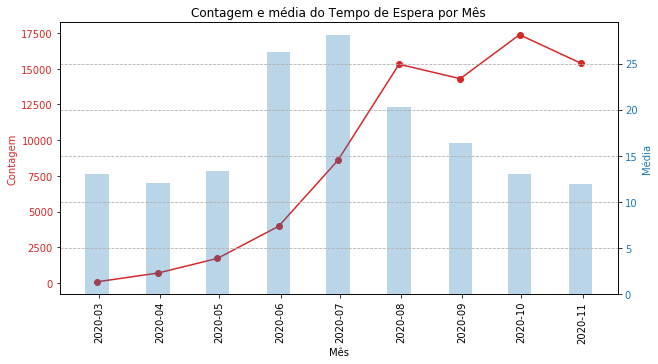

In [68]:
#plt.figure(figsize=(8, 5))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(tempo_espera_medio_mensal['Tempo_de_Espera'].index, tempo_espera_medio_mensal['Tempo_de_Espera']['count'], marker='o', color='tab:red', label = "Contagem")
ax.tick_params(axis='y', labelcolor='tab:red')
ax.yaxis.label.set_color("tab:red")
plt.ylabel("Contagem")
plt.xlabel("Mês")
plt.xticks(rotation=90)

ax2 = ax.twinx()
ax2.bar(tempo_espera_medio_mensal['Tempo_de_Espera'].index, tempo_espera_medio_mensal['Tempo_de_Espera']['mean'], width = 11.9, color='tab:blue', alpha=0.3, label = "Média")
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.yaxis.label.set_color("tab:blue")
plt.ylabel("Média")

plt.title("Contagem e média do Tempo de Espera por Mês")
plt.xlabel("Mês")

plt.grid(True, linestyle='--')
plt.show()

<p style='text-align: justify;'>A análise do gráfico do Tempo_de_Espera mostra um comportamento interessante. Até julho, houve um crescimento expressivo do número de chamadas. Após agosto, esse número apresentou uma queda, depois um pequeno acréscimo e, novamente, uma pequena queda, mas nada muito expressivo.

<p style='text-align: justify;'>Já em relação a média do tempo de espera para atendimento, mostrou certa estabilidade entre os meses de fevereiro-abril e teve um salto expressivo no mês de maio, praticamente dobrando o tempo de espera que era de 13 para 26. Contudo, a partir do mês de julho, o tempo de espera médio começa a cair gradativamente nos meses subsequentes, até atingir o valor mínimo, que foi de 11.99 em novembro.

A seguir é realizado um merge com o objetivo de analisar quando os clientes fazem ligações em relação a data de credenciamento.

O primeiro passo é dropar das tabelas os accountid que são NaN ou que estão vazios - há apenas no dataframe cadastro.
Depois é realizado o merge entre os dataframes cadastro e base_de_dados e, por fim, o cáculo em dias da diferença da data do chamado em relação a data do credenciamento.

In [69]:
cadastro

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid,regiao
0,2020-04-18,Feira de Santana,BA,SS12,NaN,Nordeste
1,2020-10-16,Bacuri,MA,SS12,NaN,Nordeste
2,2020-09-01,Bernardo Sayão,TO,SS12,NaN,Norte
3,2020-08-29,Rio de Janeiro,RJ,RR78,NaN,Sudeste
4,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste
...,...,...,...,...,...,...
66152,2020-06-18,Aracaju,SE,RR78,0013j00002ye8jtAAA,Nordeste
66153,2020-10-20,Feira de Santana,BA,HH45,NaN,Nordeste
66154,2020-07-31,Niterói,RJ,HH45,0013j00002z1AyaAAE,Sudeste
66155,2020-09-16,Itajaí,SC,RR78,0013j00002zfshHAAQ,Sul


In [70]:
base_dados

,accountid,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id,assunto_primario,assunto_secundario,assunto_terciario
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso
1,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU,Produto,S920,Ativação
2,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU,Produto,Cartão pré-pago,Dúvidas
3,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC,Logística,Envio de Cartão,Tracking
4,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC,Pedido,Cancelamento,Outros
...,...,...,...,...,...,...,...,...,...,...,...
77484,0013j00002yi49FAAQ,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ,Aplicativo,Dúvidas funcionalidades App,Prazos e taxas
77485,0013j00002yi49FAAQ,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ,Produto,D195,Ativação
77486,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ,Cadastro,Recredenciamento,Dúvidas
77487,0013j00002yi49FAAQ,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ,Produto,Cartão pré-pago,Dúvidas


In [71]:
base_dados.dropna(subset = ["accountid"], inplace=True)
cadastro.dropna(subset = ["accountid"], inplace=True)

In [72]:
base_dados.reset_index(drop=True, inplace=True)
cadastro.reset_index(drop=True, inplace=True)

In [73]:
base_dados['Data_de_Referência'] = pd.to_datetime(base_dados['Data_de_Referência'],format='%Y-%m-%d')
cadastro['Data_Credenciamento'] = pd.to_datetime(cadastro['Data_Credenciamento'],format='%Y-%m-%d')

In [74]:
# fazendo um merge entre os dois dataframes:
concatenando = pd.merge(cadastro, base_dados, how='outer', on ='accountid')

In [75]:
concatenando

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid,regiao,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id,assunto_primario,assunto_secundario,assunto_terciario
0,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso
1,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU,Produto,S920,Ativação
2,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU,Produto,Cartão pré-pago,Dúvidas
3,2020-08-28,Itaboraí,RJ,SS12,0013j00002zQgldAAC,Sudeste,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC,Logística,Envio de Cartão,Tracking
4,2020-08-28,Itaboraí,RJ,SS12,0013j00002zQgldAAC,Sudeste,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC,Pedido,Cancelamento,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77484,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ,Aplicativo,Dúvidas funcionalidades App,Prazos e taxas
77485,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ,Produto,D195,Ativação
77486,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ,Cadastro,Recredenciamento,Dúvidas
77487,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ,Produto,Cartão pré-pago,Dúvidas


In [76]:
concatenando['diferença_dias'] = (concatenando['Data_de_Referência'] - concatenando['Data_Credenciamento']).dt.days

In [77]:
concatenando

,Data_Credenciamento,Cidade_Origem,Estado_Origem,Tipo_Produto,accountid,regiao,Data_de_Referência,channelid,Tempo_de_Espera,missed,Pesquisa_de_Satisfação,assunto,Id,assunto_primario,assunto_secundario,assunto_terciario,diferença_dias
0,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso,3
1,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU,Produto,S920,Ativação,3
2,2020-07-28,São Gonçalo,RJ,RR78,0013j00002z0CeEAAU,Sudeste,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU,Produto,Cartão pré-pago,Dúvidas,57
3,2020-08-28,Itaboraí,RJ,SS12,0013j00002zQgldAAC,Sudeste,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC,Logística,Envio de Cartão,Tracking,1
4,2020-08-28,Itaboraí,RJ,SS12,0013j00002zQgldAAC,Sudeste,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC,Pedido,Cancelamento,Outros,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77484,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-08-26,2.0,9.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Prazos ...,0013j00002yi49FAAQ,Aplicativo,Dúvidas funcionalidades App,Prazos e taxas,67
77485,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-09,2.0,4.0,False,NaN,Produto:D195:Ativação,0013j00002yi49FAAQ,Produto,D195,Ativação,81
77486,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-21,2.0,3.0,False,NaN,Cadastro:Recredenciamento:Dúvidas,0013j00002yi49FAAQ,Cadastro,Recredenciamento,Dúvidas,93
77487,2020-06-20,Petrópolis,RJ,HH45,0013j00002yi49FAAQ,Sudeste,2020-09-21,2.0,3.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002yi49FAAQ,Produto,Cartão pré-pago,Dúvidas,93


In [78]:
concatenando['diferença_dias'].describe()

count    77489.000000
mean        41.112261
std         65.912540
min       -231.000000
25%          7.000000
50%         17.000000
75%         47.000000
max        457.000000
Name: diferença_dias, dtype: float64

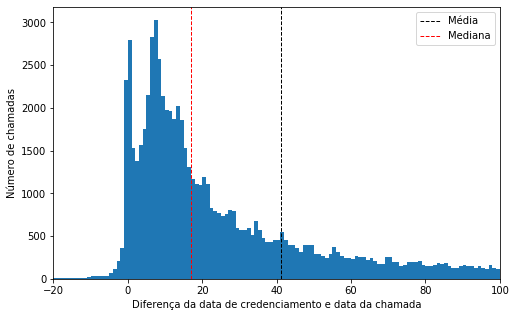

In [79]:
plt.figure(figsize=(8, 5))
media = concatenando['diferença_dias'].mean()
mediana = concatenando['diferença_dias'].median()
plt.hist(concatenando['diferença_dias'], bins=range(-20, 150))
plt.ylabel('Número de chamadas')
plt.xlabel('Diferença da data de credenciamento e data da chamada')
plt.xlim(xmin=-20, xmax = 100)
plt.axvline(media, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=1)
plt.legend({'Média':media,'Mediana':mediana})
plt.show()

O gráfico mostra dois comportamentos interessantes:
- Há valores negativos. Ou seja, alguns clientes realizam chamadas antes de serem credenciados.
- O gráfico deixa claro também que pelo menos 50% dos chamados são realizados antes da diferença de 17 dias (mediana), entre a data do chamado e do credenciamento.

<p style='text-align: justify;'>Além disso, o comportamento do gráfico indica forte concentração dos dados até a diferença de dez dias, decaindo de forma exponencialmente, e depois, se estabilizando com quedas menores conforme a diferença de dias cresce.
Como esperado, boa parte das ligações são concentradas numa diferença pequena entre data da referência e do credenciamento.

# Fazendo uma análise mensal:

In [80]:
result = concatenando.groupby([pd.Grouper(key="Data_de_Referência", freq="1M"),'Tipo_Produto'])['Tipo_Produto'].count() # faz o groupby semanal pela max_macine

In [81]:
result

Data_de_Referência  Tipo_Produto
2020-02-29          HH45               2
                    Nenhum            10
                    RR78              11
                    SS12              68
2020-03-31          HH45              60
                    Nenhum            54
                    RR78             159
                    SS12             435
2020-04-30          HH45             646
                    Nenhum            45
                    RR78             492
                    SS12             547
2020-05-31          HH45            1756
                    Nenhum            61
                    RR78            1134
                    SS12            1027
2020-06-30          HH45            3763
                    Nenhum            56
                    RR78            2770
                    SS12            1998
2020-07-31          HH45            6641
                    Nenhum           140
                    RR78            5255
                    SS12

In [82]:
var_percentual = np.round(result.pct_change(periods=4)*100, 2)
perc = var_percentual.iloc[4:]

In [83]:
perc

Data_de_Referência  Tipo_Produto
2020-03-31          HH45            2900.00
                    Nenhum           440.00
                    RR78            1345.45
                    SS12             539.71
2020-04-30          HH45             976.67
                    Nenhum           -16.67
                    RR78             209.43
                    SS12              25.75
2020-05-31          HH45             171.83
                    Nenhum            35.56
                    RR78             130.49
                    SS12              87.75
2020-06-30          HH45             114.29
                    Nenhum            -8.20
                    RR78             144.27
                    SS12              94.55
2020-07-31          HH45              76.48
                    Nenhum           150.00
                    RR78              89.71
                    SS12              64.26
2020-08-31          HH45             -13.48
                    Nenhum           -30.71

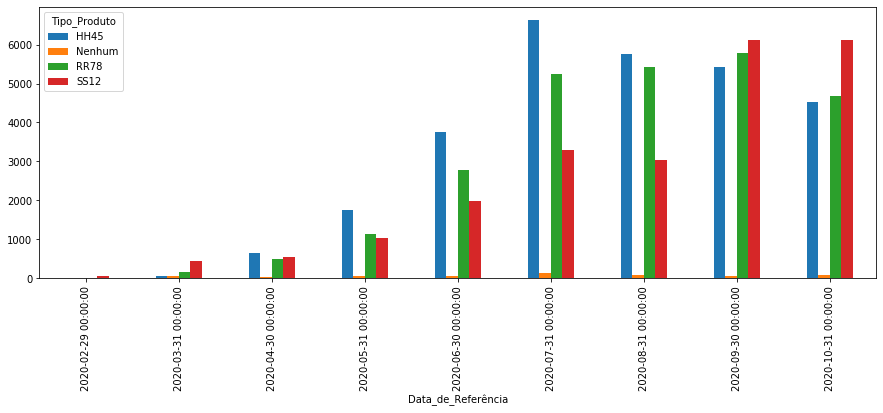

In [84]:
result.unstack().plot(kind='bar', stacked=False, figsize=(15,5))
plt.show()

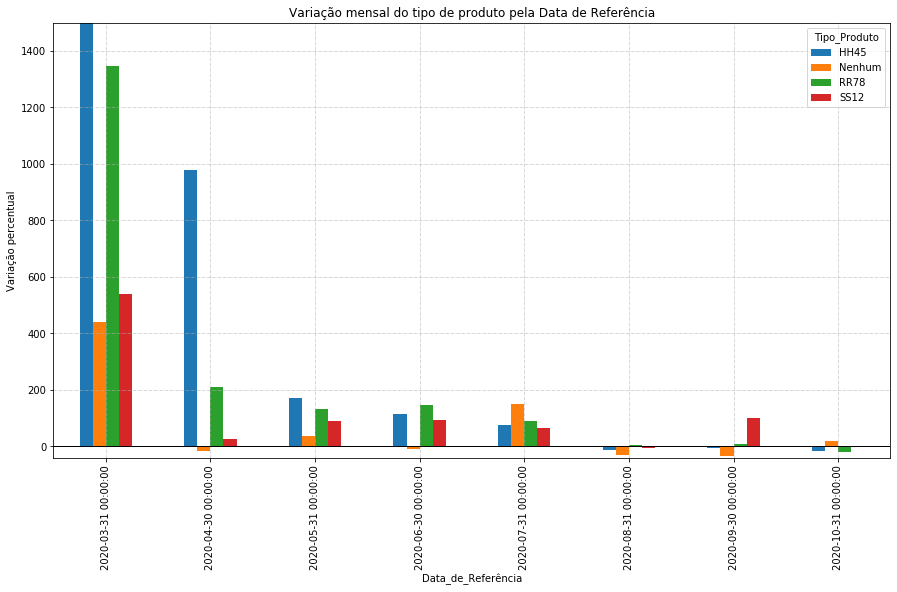

In [85]:
#plt.figure(figsize=(8, 5))
perc.unstack().plot(kind='bar', stacked=False, figsize=(15,8))
plt.axhline(linewidth=1, color='black')
#plt.xticks(rotation=0)
plt.ylabel("Variação percentual")
plt.title("Variação mensal do tipo de produto pela Data de Referência")
#plt.legend(loc='right', bbox_to_anchor=(1.2, 0.9))
plt.ylim(ymin=-40, ymax = 1500)
plt.grid(True, linestyle='-.', linewidth = 0.5)
plt.show()

O gráfico anterior, ilustra o produto pela data de referência. Alguns pontos chamam a atenção:

- <p style='text-align: justify;'>Até o mês de julho, HH45 apresentou forte expansão na contagem. Nos meses subsequentes, passou a ter quedas e não apenas isso, nos meses de setembro e outubro foi ultrapassado tanto pelo RR78 quanto pelo SS12.
- <p style='text-align: justify;'>Durante todos os meses, RR78 apresentou um acréscimo, exceto no último mês, em outubro, que apresentou uma redução. Além disso, em momento algum chegou a ser líder na contagem.
- <p style='text-align: justify;'>SS12 teve crescimento em todos os meses, menos em agosto, que teve uma pequena queda em relação ao mês anterior. Nos últimos dois meses, setembro e outubro, SS12 passou a ser líder na contagem.

<p style='text-align: justify;'>Há uma relação inversa do gráfico da contagem e a variação percentual: conforme nossa contagem cresce, a variação passa a ser reduzida, o que é intuitivo, uma vez que quando um número é pequeno, qualquer variação nesse número pode ser bem expressiva. Assim, farei uma nova análise seguinte, entre julho e outubro, contudo fazendo o intervalo semanal. Isso pode poprocionar resultados interessantes.

# Fazendo uma análise semanal:

In [86]:
result = concatenando.groupby([pd.Grouper(key="Data_de_Referência", freq="1W"),'Tipo_Produto'])['Tipo_Produto'].count() # faz o groupby semanal pela max_macine

In [87]:
inicio = pd.to_datetime('2020-07-01',format='%Y-%m-%d')
final = pd.to_datetime('2020-10-31',format='%Y-%m-%d')

In [88]:
intervalo = result.truncate(before = inicio, after = final)

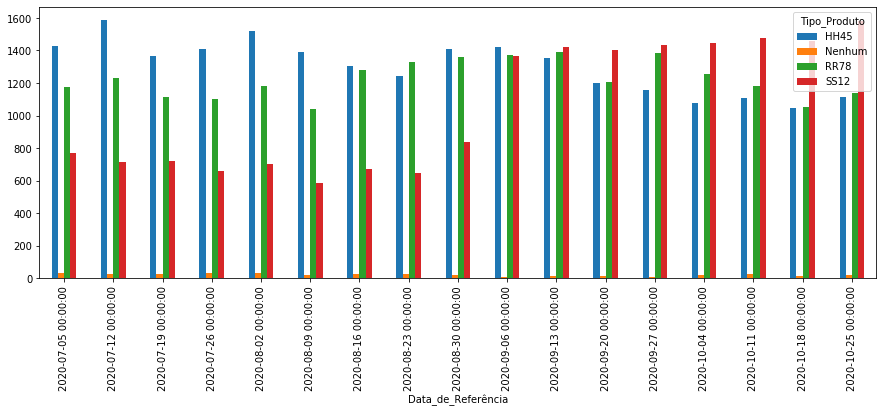

In [89]:
intervalo.unstack().plot(kind='bar', stacked=False, figsize=(15,5))
plt.show()

In [90]:
var_percentual = np.round(intervalo.pct_change(periods=4)*100, 2)
perc = var_percentual.iloc[4:]

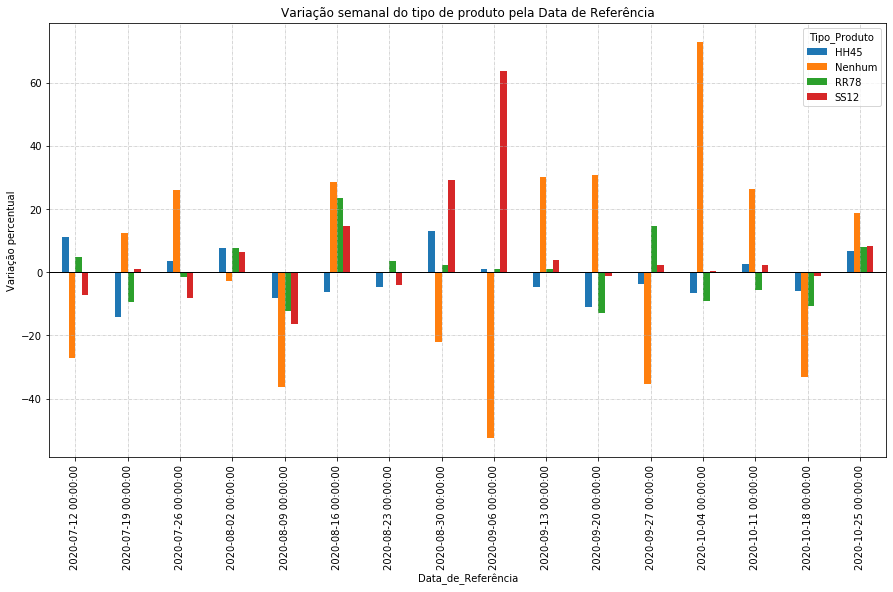

In [91]:
#plt.figure(figsize=(8, 5))
perc.unstack().plot(kind='bar', stacked=False, figsize=(15,8))
plt.axhline(linewidth=1, color='black')
#plt.xticks(rotation=0)
plt.ylabel("Variação percentual")
plt.title("Variação semanal do tipo de produto pela Data de Referência")
#plt.legend(loc='right', bbox_to_anchor=(1.2, 0.9))
#plt.ylim(ymin=-40, ymax = 1500)
plt.grid(True, linestyle='-.', linewidth = 0.5)
plt.show()

Os gráficos anteriores mostram um comportamento bem interessante.

- <p style='text-align: justify;'>Clientes que não possuem nenhum produto tiveram as maiores variações no período, o que faz sentido, uma vez que sua contagem foi sempre bem reduzida. Então qualquer mudança provoca alta variação percentual.
- <p style='text-align: justify;'>Todos os tipos de produto tiveram uma variação negativa da semana 02/08/2020 para a 09/08/2020. Já a última semana registrada, que começou no dia 25/10/2020, todas as variações foram positivas, foi a única semana que todos os tipois de produto tiveram variações positivas.
- <p style='text-align: justify;'>O produto SS12 teve os maiores picos positivos de variação, exluindo aqueles que não possuem nenhum produto. Esses picos ocorreram no fim de agosto e início de setembro, exatamente no período em que SS12 se aproximou da contagem do HH45, vindo a ultrapassá-lo nas semanas subsequentes e continuando na liderança de contagem.
- <p style='text-align: justify;'>Além de possuir o maior pico positivo, SS12 também teve o maior pico negativo, entre a semana  02/08/2020 e 09/08/2020 - a mesma que todos os produtos tiveram variações negativa.
- <p style='text-align: justify;'>A partir da semana 13/09/2020, HH45 perdeu a liderança para a SS12 e não apenas isso, também o segundo lugar para o RR78. O resultado permaneceu o mesmo nas semanas seguintes.

# Sugestões de KPI's:

Os KPI's recomendados são os seguintes:
- <p style='text-align: justify;'>Quantidade de chamados/tipo de produto adquirido: Verificar a quantidade de chamados em relação ao produto adquirido. Isso dá uma ideia da quantidade de chamados pelo tipo de porduto adquirido e é possível fazer um ranqueamento a partir desses dados. Algum produto teve proporção de chamadas maior que os outros? Por qual motivo? Foi apenas um pico ou se manteve crescente ou descendente?
- <p style='text-align: justify;'>Assunto do chamado/tipo de produto adquirido: Verificar qual assunto de chamado foi mais requisitado dado o produto adquirido. Assim, é possivel focar nos principais assuntos e desenvolver soluções agéis a fim de ter uma melhor experiência com o cliente.
- <p style='text-align: justify;'>Pesquisa de satisfação/assunto: verificar quais assuntos (o desmembramento pela ordem de assunto - primário, secundário e terciário pode ajudar) foram melhores avaliados, quais foram piores e quais não foram resolvidos. A partir daí é possível traçar estratégias e ver como é possível melhorar o atendimento ao cliente, com o objetivo de melhorar os assuntos que tiverem pior avaliação no atendimento e manter a qualidade daqueles que são bem avaliados.